In [6]:
from functools import partial

def f(x: list[float], coeffs: list[float]) -> float:
    '''return a(x1 - b)^2 + c(x2 - d)^2'''
    return coeffs[0]*(x[0] - coeffs[1])**2 + coeffs[2]*(x[1] - coeffs[3])**2

f1 = partial(f, coeffs=[2,  6, 3,  6])

f2 = partial(f, coeffs=[3, -4, 1, -6])

f3 = partial(f, coeffs=[1, -7, 2,  8])

funcs = [f1, f2, f3]

concessions = [10, 100]

x0 = [.0, .0]

In [12]:
from scipy.optimize import minimize
import numpy as np
points = []
constr0 = None
concessions1, concessions2, concessions3 = 10, 100, 0

#### ------ итерация 0 ------ ####

min_x1 = minimize(f1, x0, constraints=constr0).x # [6, 6]

ff1 = lambda x: f1(x) - f1(min_x1)

constr1 = [{'type': 'ineq', 'fun': lambda x: -ff1(x) + concessions1}]

points.append(min_x1)

#### ------ итерация 1 ------ ####

min_x2 = minimize(f2, min_x1, constraints=constr1).x # [3.91, 5.33]

ff2 = lambda x: f2(x) - f2(min_x2)

constr2 = [
    {'type': 'ineq', 'fun': lambda x: -ff1(x) + concessions1},
    {'type': 'ineq', 'fun': lambda x: -ff2(x) + concessions2}
]

points.append(min_x2)

#### ------ итерация 3 ------ ####

min_x3 = minimize(f3, min_x2, constraints=constr2).x # [3.82, 6.42]

ff3 = lambda x: f3(x) - f3(min_x3)

constr3 = [
    {'type': 'ineq', 'fun': lambda x: -ff1(x) + concessions1},
    {'type': 'ineq', 'fun': lambda x: -ff2(x) + concessions2},
    {'type': 'ineq', 'fun': lambda x: -ff3(x) + concessions3}
]

points.append(min_x3)
points = np.array(points)
points

array([[5.99999999, 5.99999999],
       [3.91658518, 5.33698533],
       [3.8246716 , 6.4226475 ]])

In [13]:
from copy import copy

def ffffff(x0, funcs, concessions):
	constr = []
	points = []
	concessions += [0]
	x_ = x0
	for i in range(len(funcs)):
		min_x = minimize(funcs[i], x_, constraints=constr).x
		x_ = min_x
		func = copy(funcs[i])
		concession = copy(concessions[i])
		inequality = lambda x: func(x) - func(min_x)
		constr.append(
			{'type': 'ineq', 'fun': lambda x: -inequality(x) + concession}
		)
		points.append(min_x)
	return points

points = ffffff(x0, funcs, concessions)
points

array([[5.99999999, 5.99999999],
       [3.91658518, 5.33698533],
       [3.8246716 , 6.4226475 ]])

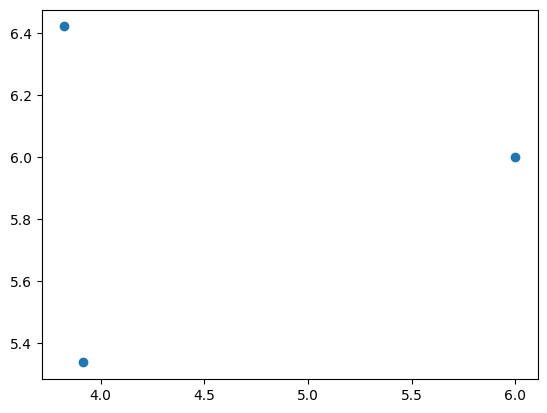

In [14]:
import matplotlib.pyplot as plt

plt.scatter(points[:, 0], points[:, 1])